# Proyecto 3 - Ataques a modelos de Deep Learning
Security Data Science

Sergio Marchena - 16387

UVG

In [1]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Flatten
from keras.models import model_from_json
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
import seaborn as sns

## 1. Se debe mostrar un entrenamiento y predicción del modelo original 

In [2]:
dir = 'malimg_paper_dataset_imgs'
batches = ImageDataGenerator().flow_from_directory(directory=dir, target_size=(64,64), batch_size=10000)
imgs, labels = next(batches)

Found 9339 images belonging to 25 classes.


In [3]:
x_train, x_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

print('x_train:', x_train.shape)
print('x_test: ', x_test.shape)

print('y_train:', x_train.shape)
print('y_test: ', x_test.shape)

x_train: (6537, 64, 64, 3)
x_test:  (2802, 64, 64, 3)
y_train: (6537, 64, 64, 3)
y_test:  (2802, 64, 64, 3)


In [4]:
# load json and create model
json_file = open('modelo.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("modelo.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_test,  y_test, verbose=2)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-05-13 20:49:15.060991: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-13 20:49:15.061187: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Loaded model from disk


2022-05-13 20:49:15.649342: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-13 20:49:15.764589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


88/88 - 2s - loss: 0.0774 - accuracy: 0.9786 - 2s/epoch - 23ms/step
accuracy: 97.86%


In [5]:
y_predict = np.argmax(loaded_model.predict(x_test), axis=-1)
y_test = np.argmax(y_test, axis=1)

2022-05-13 20:49:17.863627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [6]:
c_matrix = metrics.confusion_matrix(y_test, y_predict)

In [7]:
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=10):
    df_cm = pd.DataFrame( confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d",  cmap='YlGnBu')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


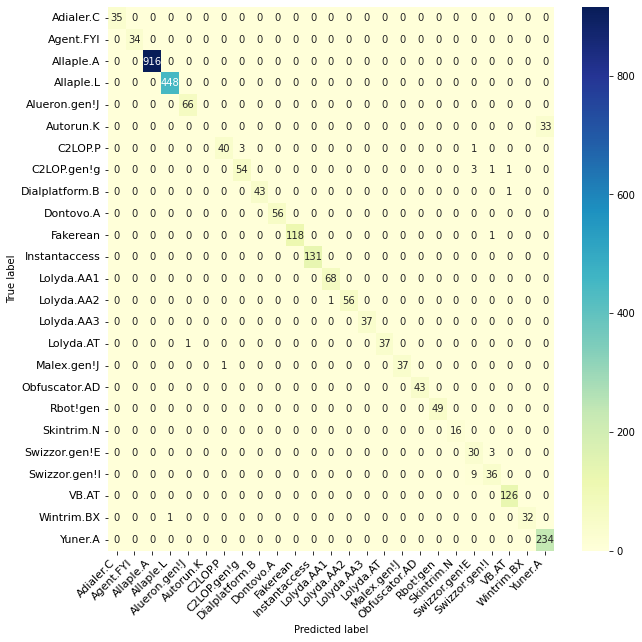

In [8]:
class_names= batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (10,10), fontsize=11)

## 2. Se  debe  crear  un  modelo  robado  a  partir  del  modelo  original,  entrenado  con  data completamente aleatoria, con los ataques Copycat CNN y KnockoffNets. 

In [17]:
import art
from art.attacks import ExtractionAttack
from art.attacks.extraction import CopycatCNN, KnockoffNets
from art.estimators.classification import KerasClassifier
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Flatten, InputLayer, Reshape

from tensorflow.keras.models import load_model
from art.utils import load_dataset, get_file
from art import config

tf.compat.v1.disable_eager_execution() 
print(tf.executing_eagerly())
import sys
print(sys.getrecursionlimit())

False
3000


In [28]:
num_epochs = 5
len_steal = 1401

path2 = get_file('modelo.h5', extract=False, path=config.ART_DATA_PATH, 
    url='file:///Users/sergiomarchena/Documents/security data science/proyecto3/modelo.h5')

classifier_model = load_model(path2)

classifier_original = KerasClassifier(classifier_model, clip_values=(0, 1), use_logits=False)

2022-05-13 21:14:23.294033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-13 21:14:23.362917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-13 21:14:23.682136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-13 21:14:23.786446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-13 21:14:23.810408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-13 21:14:23.832790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-13 21:14:23.899494: I tensorflow/core/grappler/optimizers/cust

In [30]:
attack_catalogue = {"Probabilistic CopycatCNN": CopycatCNN(classifier=classifier_original,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=True),
                    "Argmax CopycatCNN": CopycatCNN(classifier=classifier_original,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=False),
                    "Probabilistic KnockoffNets": KnockoffNets(classifier=classifier_original,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=True),
                    "Argmax KnockoffNets": KnockoffNets(classifier=classifier_original,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=False),
                   }

In [31]:
indices = np.random.permutation(len(x_test))
x_steal = x_test[indices[:len_steal]]
y_steal = y_test[indices[:len_steal]]
x_test = x_test[indices[len_steal:]]
y_test = y_test[indices[len_steal:]]

In [33]:
im_shape = x_train[0].shape
def get_model(num_classes=10, c1=32, c2=64, d1=128):
    model = Sequential()
    model.add(layers.Conv2D(30, kernel_size=(3, 3),activation='relu', input_shape=(64,64,3)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(15, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(25, activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [37]:
results = []
for len_steal in [43, 87, 175, 350, 700, 1401]:
    indices = np.random.permutation(len(x_test))
    x_steal = x_test[indices[:len_steal]]
    y_steal = y_test[indices[:len_steal]]
    x_test = x_test[indices[len_steal:]]
    y_test = y_test[indices[len_steal:]]

    for name, attack in attack_catalogue.items():
        model_stolen = get_model(num_classes=10, c1=32, c2=64, d1=128)
        print(type(model_stolen))
        classifier_stolen = KerasClassifier(model_stolen, clip_values=(0, 1), use_logits=False)
        print(type(classifier_stolen))
        
        classifier_stolen = attack.extract(x_steal, y_steal, thieved_classifier=classifier_stolen)
        acc = classifier_stolen._model.evaluate(x_test, y_test)[1]
        print(name, ":", acc)
        results.append((name, len_steal, acc))

<class 'keras.engine.sequential.Sequential'>
<class 'art.estimators.classification.keras.KerasClassifier'>


ValueError: The target structure is of type `<class 'NoneType'>`
  None
However the input is a sequence (<class 'list'>) of length 0.
  []
nest cannot guarantee that it is safe to map one to the other.

art.estimators.classification.keras.KerasClassifier